# ***import libraries***

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,classification_report

# **load csv file**

In [6]:
data=pd.read_csv("/content/diabetic_data.csv")
data.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO


# ***converting to data frame***

In [7]:
df=pd.DataFrame(data)
df.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO


# ***Information about Data Set***

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# ***Shape of the Data Set***

In [9]:
df.shape

(101766, 50)

# ***Columns of Data Set***

In [10]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

# ***Describe Data Set***

In [11]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# ***Handling Missing Values***

In [12]:
df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [13]:
df=df.replace('?',0)
df=df.apply(pd.to_numeric,errors='ignore')
df.to_csv('adult.csv',index=False)
print(df)


<ipython-input-13-6e81b2c2ed75>:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df=df.apply(pd.to_numeric,errors='ignore')


        encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      0   
1             149190     55629189        Caucasian  Female  [10-20)      0   
2              64410     86047875  AfricanAmerican  Female  [20-30)      0   
3             500364     82442376        Caucasian    Male  [30-40)      0   
4              16680     42519267        Caucasian    Male  [40-50)      0   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      0   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      0   
101763     443854148     41088789        Caucasian    Male  [70-80)      0   
101764     443857166     31693671        Caucasian  Female  [80-90)      0   
101765     443867222    175429310        Caucasian    Male  [70-80)      0   

        admission_type_id  discharge_disposition_id  admission_

# ***Handling Duplicates***

In [14]:
df.duplicated().sum()

np.int64(0)

# ***Encoding***

In [18]:
x=df.drop('patient_nbr', axis=1)
y=df['patient_nbr']
print(x.columns)
print(y)


Index(['encounter_id', 'race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
162        80499960
192        89193870
460        76959585
593       114960726
696 

In [24]:
oh = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
patient_nbr_reshape = df['patient_nbr'].values.reshape(-1, 1)
e_Gender = oh.fit_transform(patient_nbr_reshape)
encoded_patient_nbr = pd.DataFrame(e_Gender, columns=oh.get_feature_names_out(['patient_nbr']), dtype=int)
encoded_patient_nbr

,patient_nbr_822798,patient_nbr_1275921,patient_nbr_1305270,patient_nbr_1504701,patient_nbr_1738134,patient_nbr_2688507,patient_nbr_3306996,patient_nbr_3500145,patient_nbr_3843594,patient_nbr_3972258,...,patient_nbr_114043842,patient_nbr_114196779,patient_nbr_114416514,patient_nbr_114446241,patient_nbr_114688998,patient_nbr_114960726,patient_nbr_116624732,patient_nbr_124870523,patient_nbr_126428594,patient_nbr_174774587
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
remaining_x=df[['admission_type_id','discharge_disposition_id']]
df1=pd.concat([remaining_x,encoded_df],axis=1)
df1

,admission_type_id,discharge_disposition_id,race_0,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male
162,6.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
192,6.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
460,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
696,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
293,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
294,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
295,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
296,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# ***Handling outlier's***

In [30]:
def handling_outlires(df):
  for col in df.select_dtypes(include='number').columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df[col]=df[col].apply(lambda x:upper_bound if x>upper_bound else x)
  return df

<Axes: >

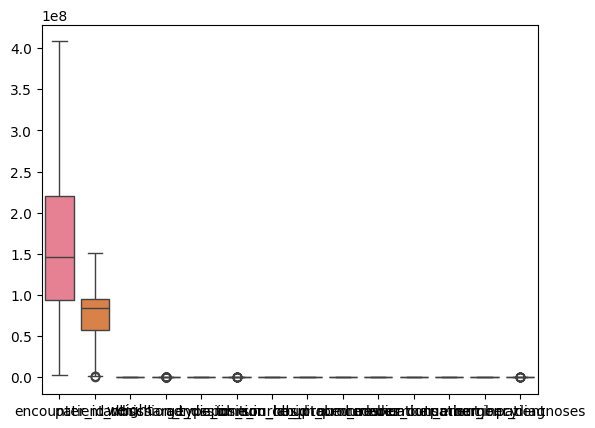

In [31]:
df1=handling_outlires(df)
df1.head()
sns.boxplot(df1)

Text(0.5, 1.0, 'Box plot for encounter_id')

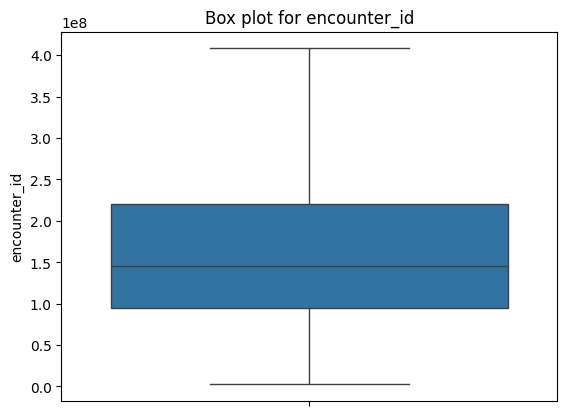

In [34]:
sns.boxplot(df['encounter_id'])
plt.title("Box plot for encounter_id")

Text(0.5, 1.0, 'Box plot for patient_nbr')

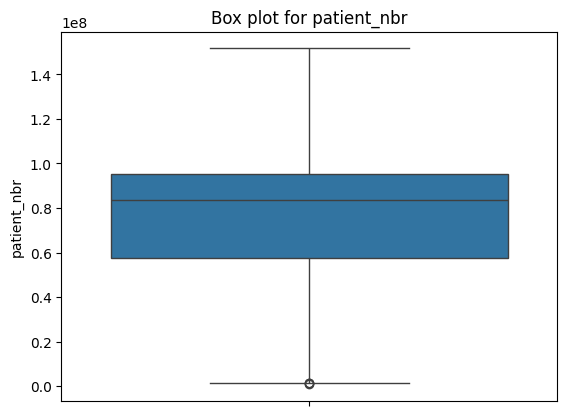

In [35]:
sns.boxplot(df['patient_nbr'])
plt.title("Box plot for patient_nbr")

In [36]:
q1=df['patient_nbr'].quantile(0.25)
q3=df['patient_nbr'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print("First quartile:",q1)
print("Third quartile:",q3)
print("Inter Quartile Range:",iqr)
print("Lower bound:",lower_bound)
print("Upper bound:",upper_bound)

First quartile: 57733476.75
Third quartile: 95312594.25
Inter Quartile Range: 37579117.5
Lower bound: 1364800.5
Upper bound: 151681270.5


In [39]:
filtered_x=df[(df['patient_nbr']>=lower_bound) & (df['patient_nbr']<=upper_bound)]
print("Filtered Data:")
filtered_x

Filtered Data:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
162,2.521974e+06,80499960.0,Caucasian,Male,[80-90),0,6,3.0,7,5.0,...,No,No,No,No,No,No,No,No,No,<30
192,2.595612e+06,89193870.0,Caucasian,Female,[40-50),0,6,1.0,7,2.0,...,No,No,No,No,No,No,No,No,No,>30
460,4.084524e+06,76959585.0,AfricanAmerican,Female,[70-80),0,6,1.0,7,10.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
593,4.804968e+06,114960726.0,Caucasian,Female,[50-60),0,6,1.0,7,2.0,...,No,Steady,No,No,No,No,No,No,Yes,NO
696,5.319174e+06,87847776.0,Other,Male,[70-80),0,6,6.0,7,11.0,...,No,No,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100386,4.082518e+08,103832127.0,Caucasian,Male,[60-70),0,2,1.0,1,6.0,...,No,No,No,No,No,No,No,No,Yes,<30
100493,4.082518e+08,101755908.0,Caucasian,Female,[40-50),0,1,1.0,7,3.0,...,No,No,No,No,No,No,No,No,No,NO
100578,4.082518e+08,90285327.0,Caucasian,Female,[60-70),0,1,2.0,7,4.0,...,No,No,No,No,No,No,No,No,No,NO
101029,4.082518e+08,104106645.0,Caucasian,Male,[50-60),0,1,1.0,7,7.0,...,No,No,No,No,No,No,No,Ch,Yes,>30


Now there is no outliers on hsc_p column



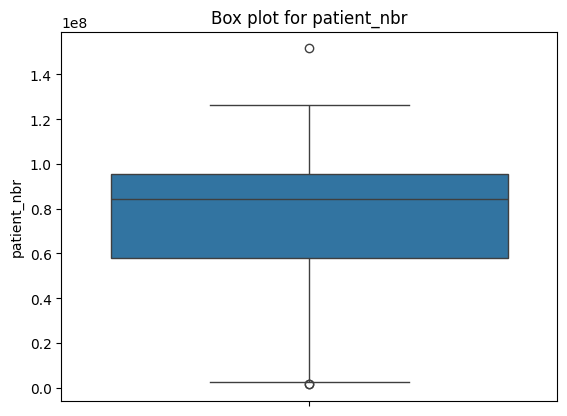

In [41]:
sns.boxplot(filtered_x['patient_nbr'])
plt.title("Box plot for patient_nbr")
print("Now there is no outliers on hsc_p column")
print()

Now there is no outliers on hsc_p column



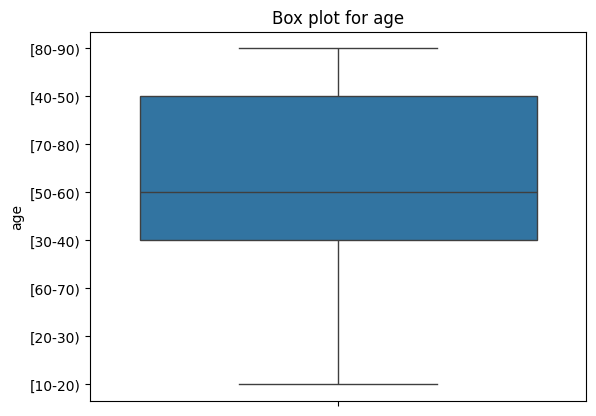

In [42]:
sns.boxplot(filtered_x['age'])
plt.title("Box plot for age")
print("Now there is no outliers on hsc_p column")
print()

Now there is no outliers on hsc_p column



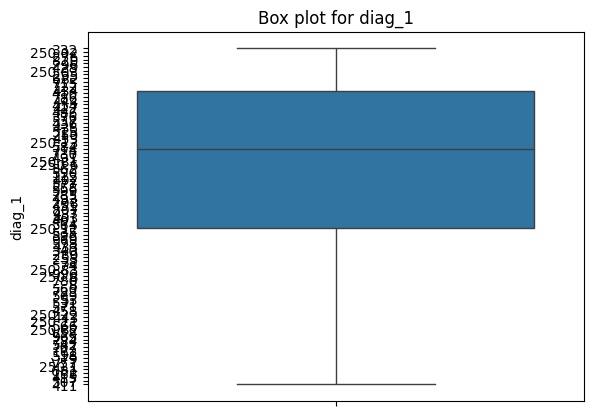

In [43]:
sns.boxplot(filtered_x['diag_1'])
plt.title("Box plot for diag_1")
print("Now there is no outliers on hsc_p column")
print()

Now there is no outliers on degree_p column



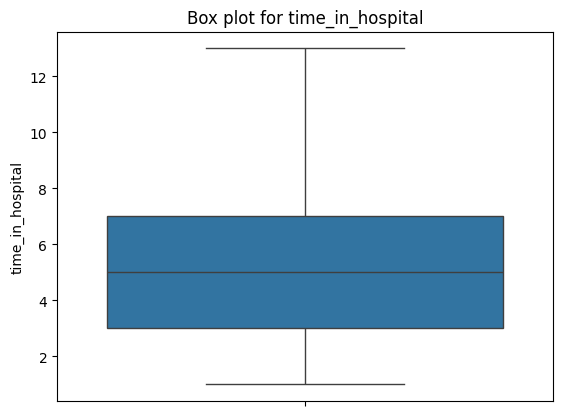

In [46]:
sns.boxplot(filtered_x['time_in_hospital'])
plt.title("Box plot for time_in_hospital")
print("Now there is no outliers on degree_p column")
print()

# ***Creating different Plots***



# ***Box plot for nemerical coulmns on independent(x) variables***

<Axes: >

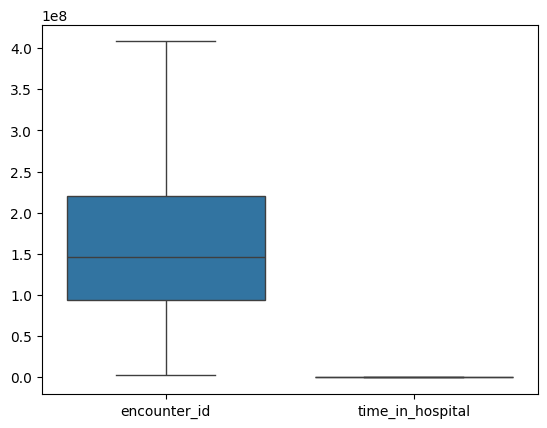

In [50]:
lst=df[['age','encounter_id','time_in_hospital']]

sns.boxplot(lst)

# ***Heat map for x(numeric) variables***

<ipython-input-53-a43bc7b57420>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_list['age'] = new_list['age'].replace({
<ipython-input-53-a43bc7b57420>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_list['age'] = new_list['age'].replace({
<ipython-input-53-a43bc7b57420>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

<Axes: >

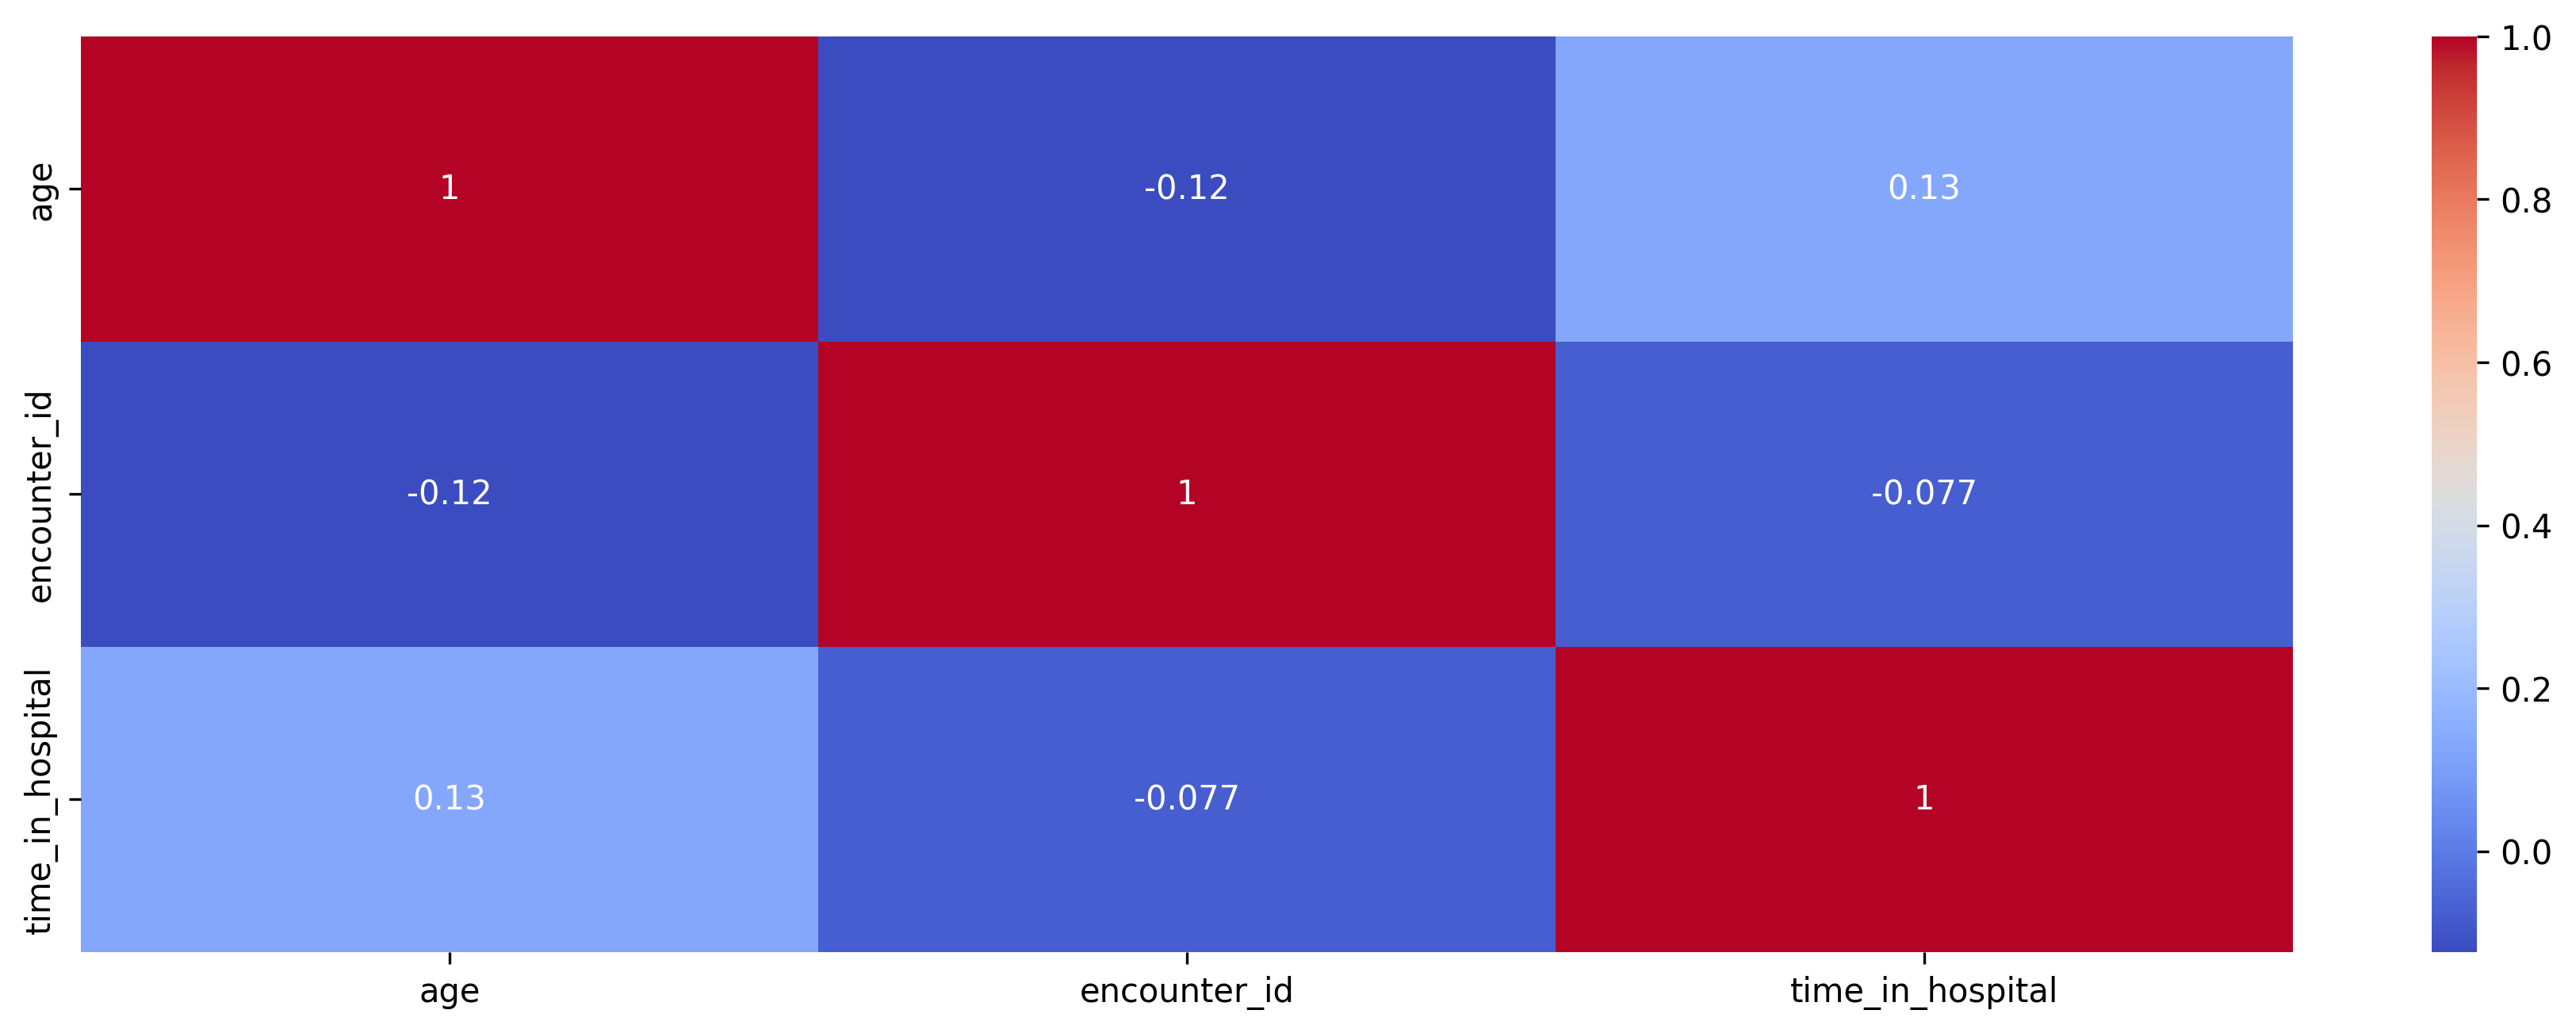

In [53]:
new_list = df[['age', 'encounter_id', 'time_in_hospital']]
plt.figure(figsize=(15, 5), dpi=300)
for col in new_list.columns:
    if col == 'age':  # Handle 'age' column separately
        # Replace age ranges with their midpoints
        new_list['age'] = new_list['age'].replace({
            '[0-10)': 5,
            '[10-20)': 15,
            '[20-30)': 25,
            '[30-40)': 35,
            '[40-50)': 45,
            '[50-60)': 55,
            '[60-70)': 65,
            '[70-80)': 75,
            '[80-90)': 85,
            '[90-100)': 95
        })
    else:
        new_list[col] = pd.to_numeric(new_list[col].replace('?', np.nan))

c = new_list.corr()
sns.heatmap(c, annot=True, cmap='coolwarm')

# ***histplot***

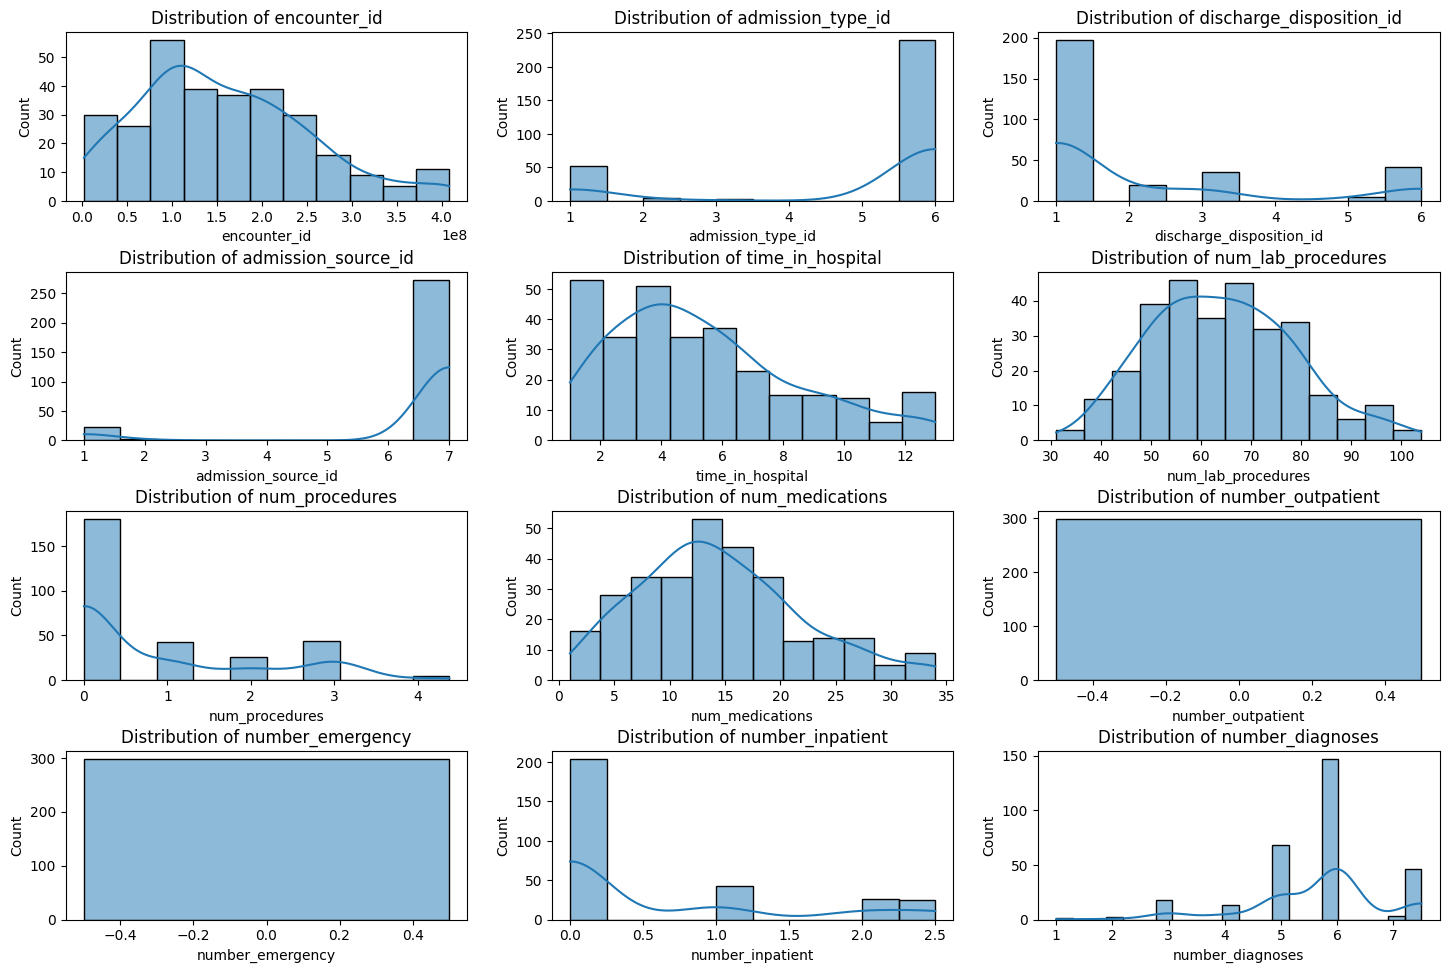

In [56]:
fix,ax= plt.subplots(4, 3,figsize=(15,10)) # Changed from 3, 3 to 4, 3 to accommodate more plots
fix.tight_layout(pad=3.0)
numeric_cols = df.select_dtypes(include='number').columns
n = numeric_cols[numeric_cols != 'patient_nbr']
for i, col in enumerate(n):
    row = i // 3  # Now correctly calculates the row index within the 4x3 grid
    col_num = i % 3
    # Access the column data from the DataFrame 'df' using the column name 'col'
    sns.histplot(df[col],kde=True, ax=ax[row, col_num])
    ax[row, col_num].set_title(f'Distribution of {col}')

plt.show()

# ***scatterplot***

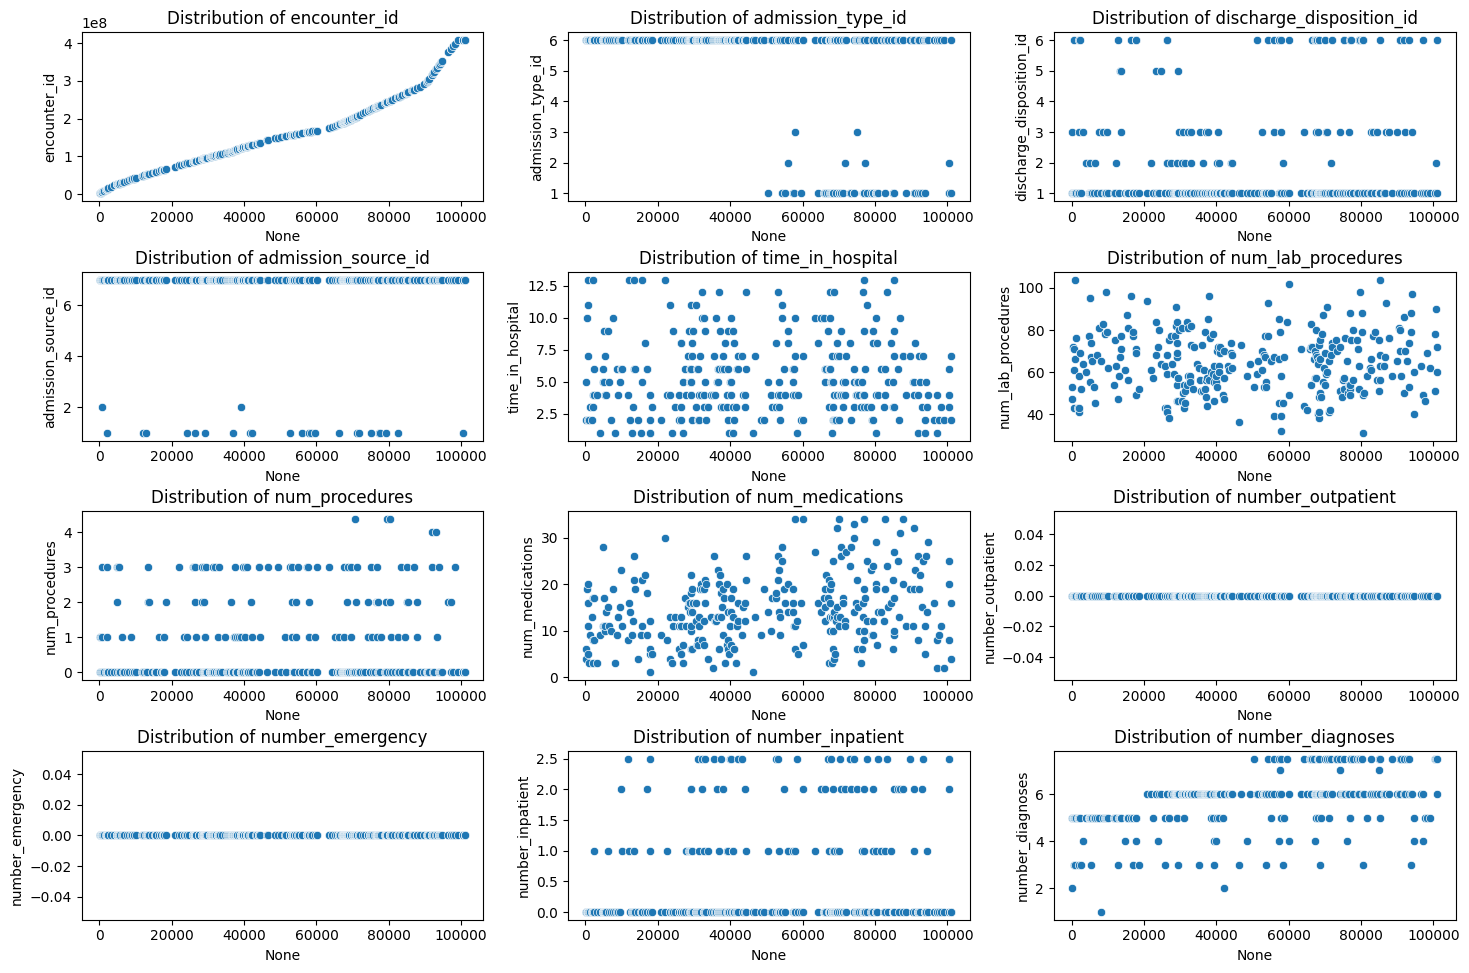

In [58]:
fix,ax= plt.subplots(4, 3,figsize=(15,10)) # Changed from 3, 3 to 4, 3 to accommodate more plots
fix.tight_layout(pad=3.0)
numeric_cols = df.select_dtypes(include='number').columns
n = numeric_cols[numeric_cols != 'patient_nbr']

for i, col in enumerate(n):
    row = i // 3  # Calculate the row index
    col_num = i % 3 # Calculate the column index
    # Access the column data from the DataFrame 'df' using the column name 'col'
    sns.scatterplot(x=df.index, y=df[col], ax=ax[row, col_num]) # Changed sns.scatterplot to include x and y
    ax[row, col_num].set_title(f'Distribution of {col}')

plt.show()

# kde ***plot***

<ipython-input-60-eb64a269668e>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], ax=ax[row, col_num])
<ipython-input-60-eb64a269668e>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], ax=ax[row, col_num])


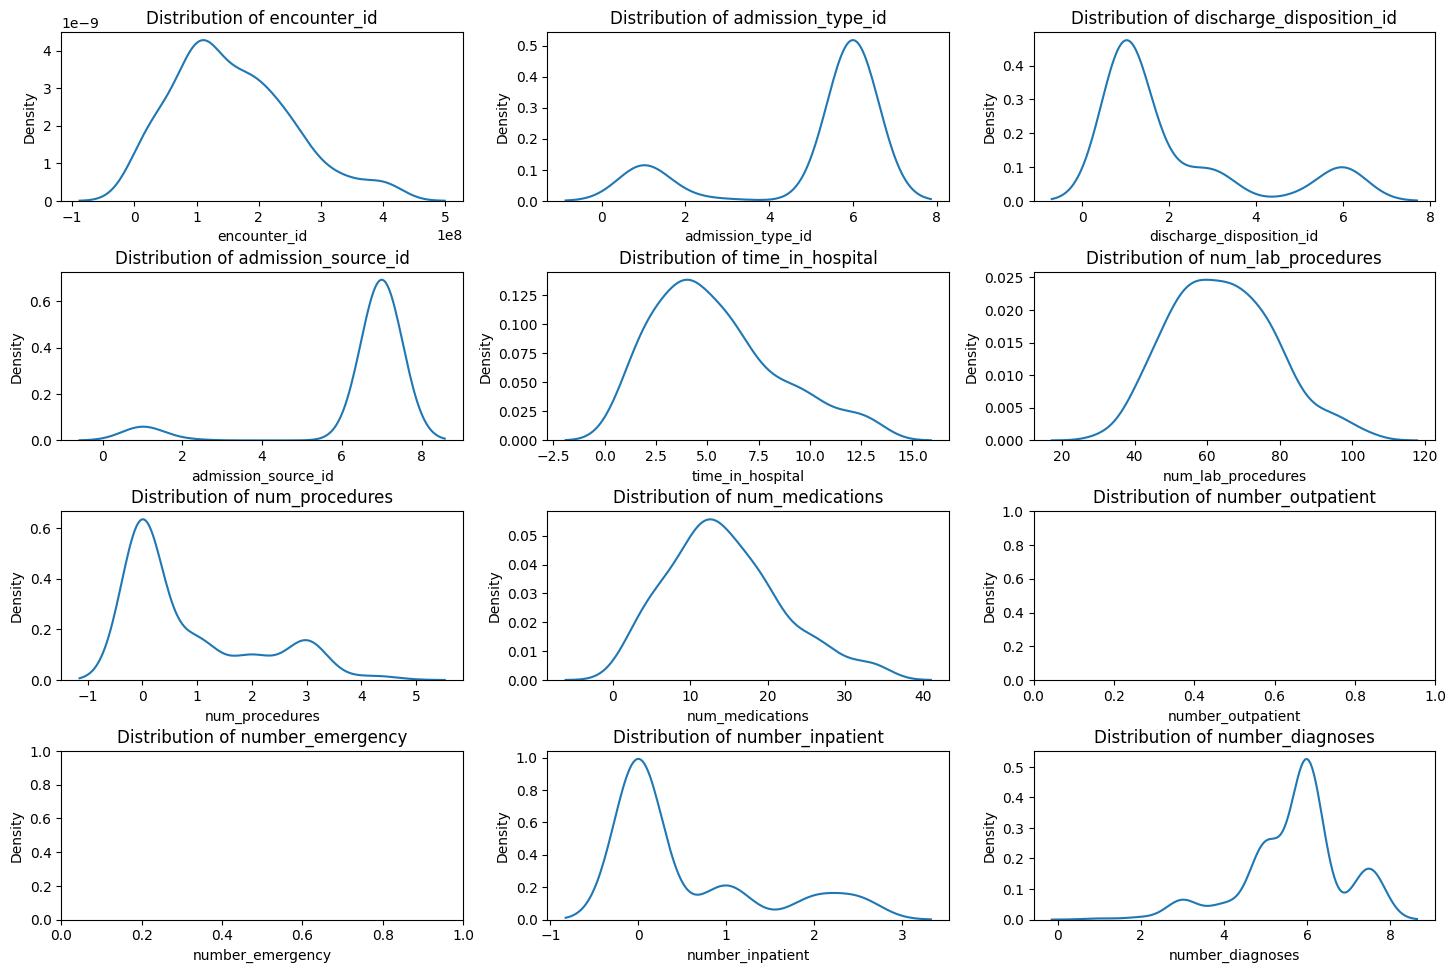

In [60]:
fix,ax= plt.subplots(4, 3,figsize=(15,10)) # Changed from 3, 3 to 4, 3 to accommodate more plots
fix.tight_layout(pad=3.0)
numeric_cols = df.select_dtypes(include='number').columns
n = numeric_cols[numeric_cols != 'patient_nbr']

for i, col in enumerate(n):
    row = i // 3  # Calculate row index, now with 4 rows
    col_num = i % 3  # Calculate column index
    # Access the column data from the DataFrame 'df' using the column name 'col'
    sns.kdeplot(df[col], ax=ax[row, col_num])
    ax[row, col_num].set_title(f'Distribution of {col}')

### **violin plot**

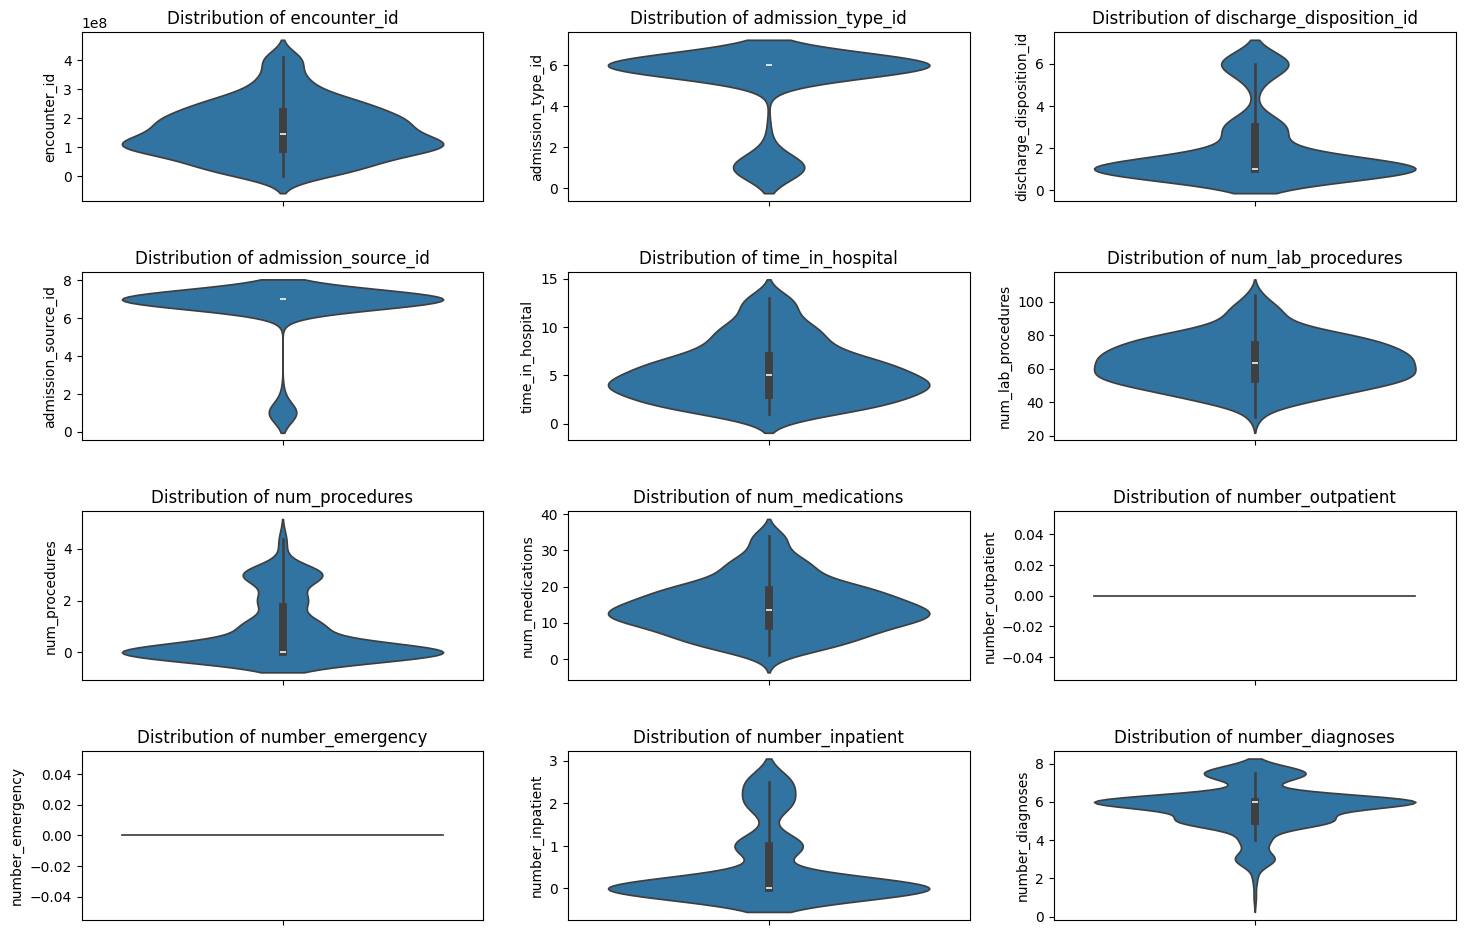

In [63]:
fix,ax= plt.subplots(4, 3,figsize=(15,10)) # Changed from 3, 3 to 4, 3 to accommodate more plots
fix.tight_layout(pad=3.0)
numeric_cols = df.select_dtypes(include='number').columns
n = numeric_cols[numeric_cols != 'patient_nbr']

for i, col in enumerate(n):
    row = i // 3  # Calculate row index, now with 4 rows to match the subplots grid.
    col_num = i % 3  # Calculate column index
    # Access the column data from the DataFrame 'df' using the column name 'col'
    sns.violinplot(df[col], ax=ax[row, col_num])
    ax[row, col_num].set_title(f'Distribution of {col}')

plt.show()

# ***skew***

In [64]:
df1.select_dtypes(include=np.number).skew()

,0
encounter_id,0.605600
patient_nbr,-0.808188
admission_type_id,-1.580233
discharge_disposition_id,1.486247
admission_source_id,-3.028379
time_in_hospital,0.716478
num_lab_procedures,0.314260
num_procedures,1.150209
num_medications,0.561160
number_outpatient,0.000000


# ***feature selection***

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
ss=StandardScaler()

In [67]:
x = df.drop('patient_nbr', axis=1)
y = df['patient_nbr']


In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# ***split x and y***

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(238, 49)
(60, 49)
(238,)
(60,)


# ***scaling***

In [70]:
numerical_features = x_train.select_dtypes(include=['number']).columns
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[numerical_features])
x_test_scaled = scaler.transform(x_test[numerical_features])

# ***model selection***

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have x_train_scaled, x_test_scaled, y_train, y_test

regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR()
}

for name, regressor in regressors.items():
    regressor.fit(x_train_scaled, y_train)
    y_pred = regressor.predict(x_test_scaled)
    print(f"\n {name} Results:")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R-squared:", r2_score(y_test, y_pred))


 Linear Regression Results:
Mean Squared Error: 884866988121640.1
R-squared: -0.12600838953909288

 Decision Tree Results:
Mean Squared Error: 2527616769330530.5
R-squared: -2.2164356067203945

 Random Forest Results:
Mean Squared Error: 891741746012762.6
R-squared: -0.13475663663766135

 SVM Results:
Mean Squared Error: 819413015530066.9
R-squared: -0.04271708897512427
